# INFO

This is my solution for the second homework problem

# **SOLUTION**

# DATA READING

Let's start with uploading our dataset - file `insurance.csv`

In [1]:
from google.colab import files
from io import StringIO

In [2]:
import pandas as pd
import numpy as np

It's a good time to upload our data - `insurance.csv`

In [3]:
uploaded_files = files.upload()

insurance_file_name = next(iter(uploaded_files))
insurance_csv = uploaded_files[insurance_file_name]

print("\nFile {name} uploaded ({length} bytes)! Extracting required data...\n".format( 
      name=insurance_file_name, length=len(insurance_csv)))

insurance_csv_string_string = StringIO(insurance_csv.decode('utf-8'))
insurance_data = pd.read_csv(insurance_csv_string_string, sep=",")

print("Extracted {number_of_lines} lines!".format(
    number_of_lines=len(insurance_data)))
print("First 10 lines of the file:\n", insurance_data[:10])

Saving insurance.csv to insurance.csv

File insurance.csv uploaded (55628 bytes)! Extracting required data...

Extracted 1338 lines!
First 10 lines of the file:
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
5   31  female  25.740         0     no  southeast   3756.62160
6   46  female  33.440         1     no  southeast   8240.58960
7   37  female  27.740         3     no  northwest   7281.50560
8   37    male  29.830         2     no  northeast   6406.41070
9   60  female  25.840         0     no  northwest  28923.13692


# VISUALIZATION

It's time to visualize data - feature to mean charges charts

In [4]:
import matplotlib.pyplot as plt

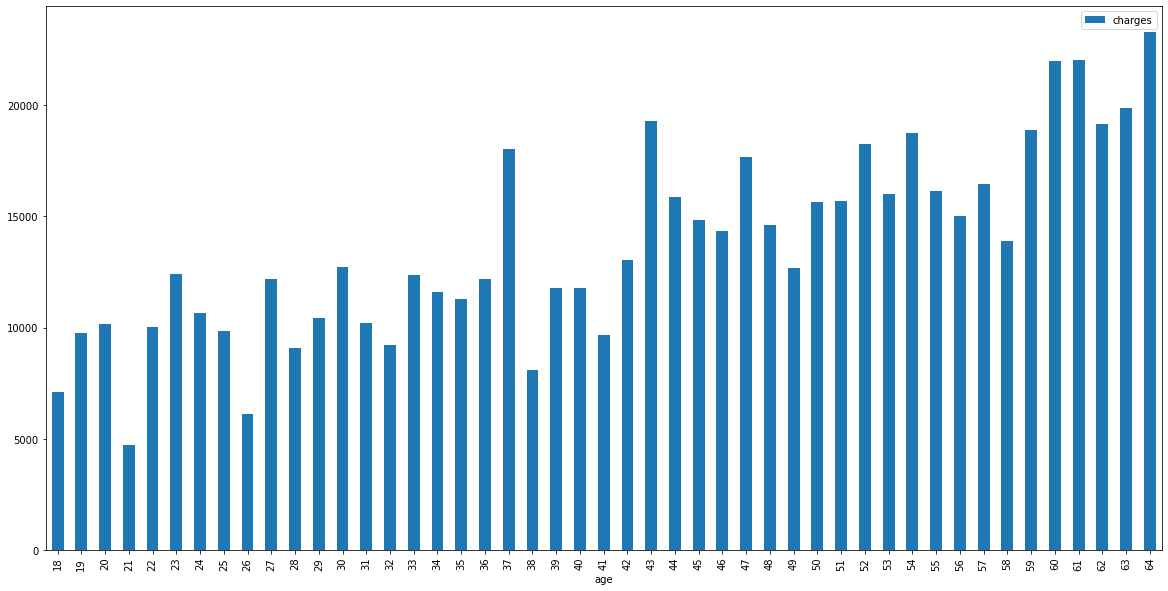

In [12]:
insurance_data \
  .groupby(["age"]) \
  .mean() \
  .plot(kind="bar", y="charges", figsize=(20, 10))

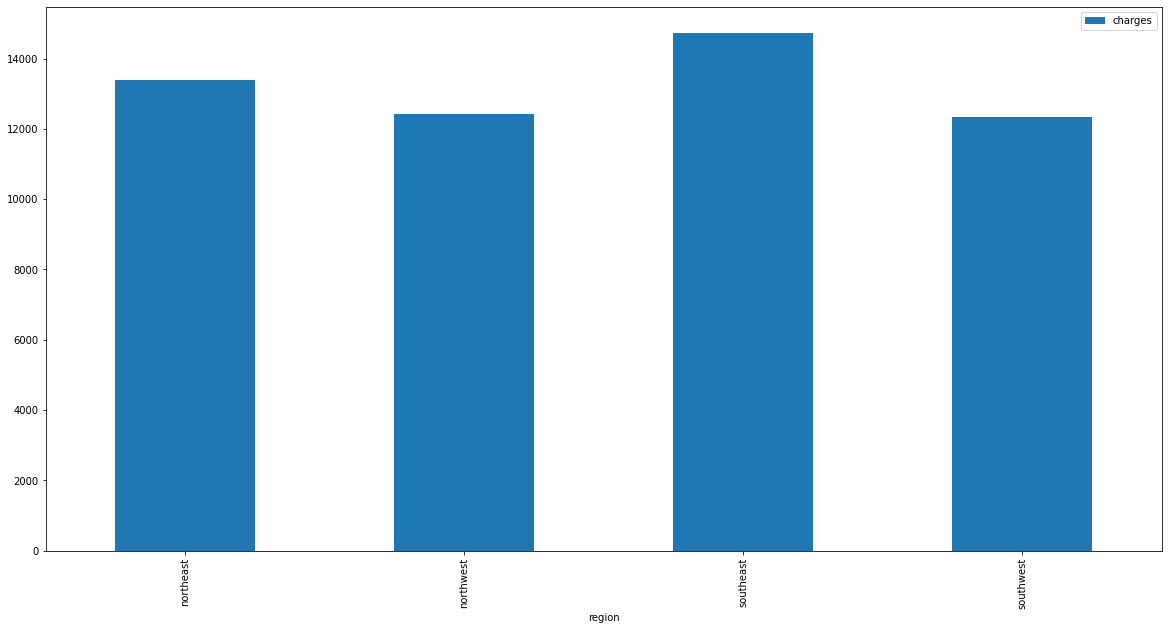

In [13]:
insurance_data \
  .groupby(["region"]) \
  .mean() \
  .plot(kind="bar", y="charges", figsize=(20, 10))

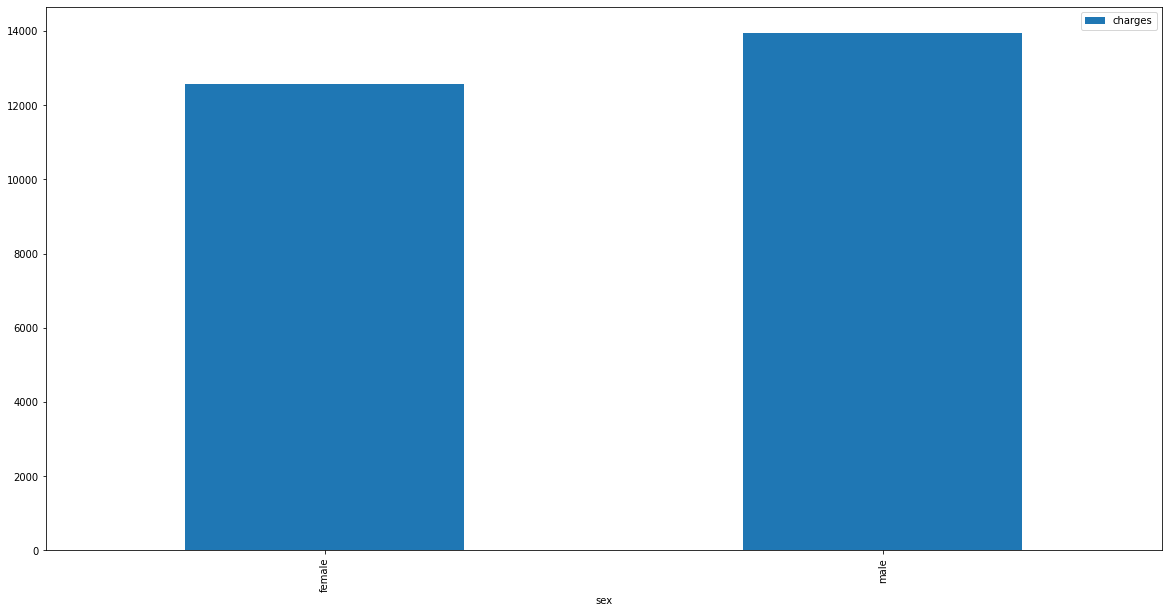

In [14]:
insurance_data \
  .groupby(["sex"]) \
  .mean() \
  .plot(kind="bar", y="charges", figsize=(20, 10))

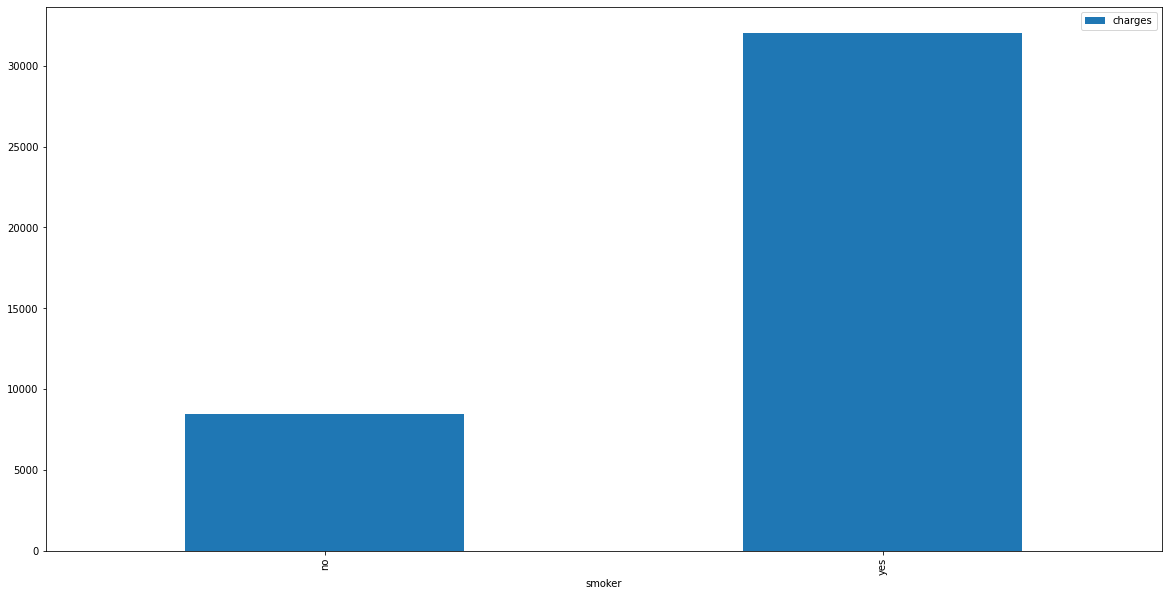

In [16]:
insurance_data \
  .groupby(["smoker"]) \
  .mean() \
  .plot(kind="bar", y="charges", figsize=(20, 10))

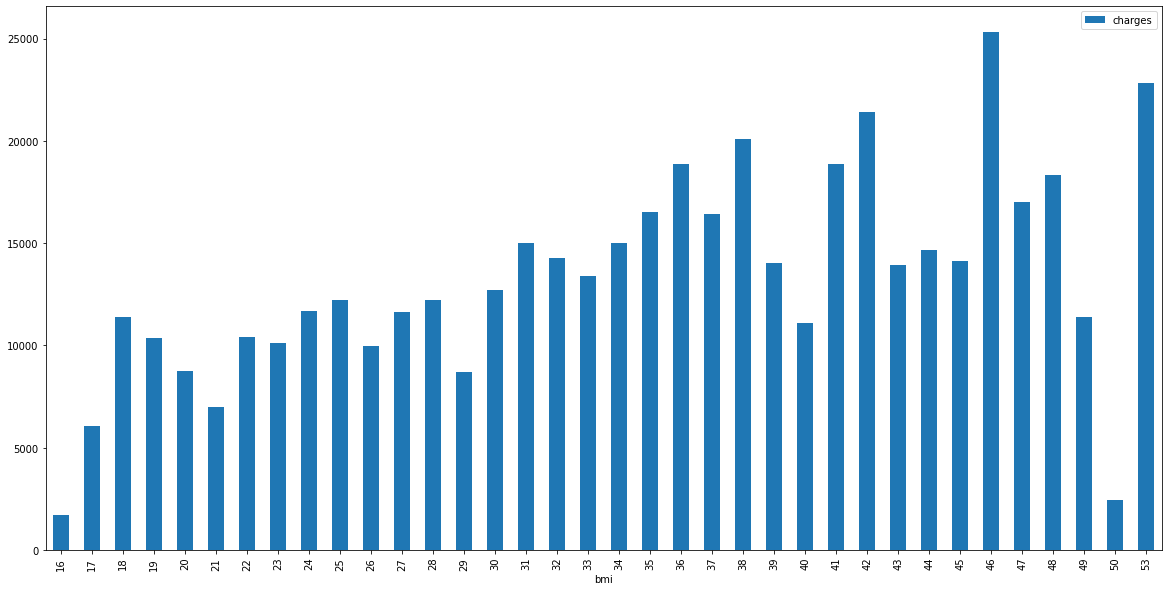

In [17]:
insurance_data \
  .groupby(insurance_data["bmi"].apply(lambda x: round(float(x)))) \
  .mean() \
  .plot(kind="bar", y="charges", figsize=(20, 10))

#DATA PREPARING

Firstly, let's split our data into training and testing sets.

In [20]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [21]:
x_insurance = insurance_data[["age", "sex", "bmi", "children", "smoker", "region"]]
y_insurance = insurance_data["charges"]

In [22]:
raw_x_train, raw_x_test, y_train, y_test = train_test_split(x_insurance, y_insurance, test_size=0.20, random_state=1237)

Let's start with encoding features with string values.

In [23]:
encoded_x_train = raw_x_train
encoded_x_train[["sex", "smoker", "region"]] = raw_x_train[["sex", "smoker", "region"]].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [24]:
encoded_x_test = raw_x_test
encoded_x_test[["sex", "smoker", "region"]] = raw_x_test[["sex", "smoker", "region"]].apply(LabelEncoder().fit_transform)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


And now, let's scale our training set.

In [25]:
scaler = MinMaxScaler().fit(encoded_x_train)
x_train = scaler.transform(encoded_x_train)

And testing set.

In [26]:
scaler = MinMaxScaler().fit(encoded_x_test)
x_test = scaler.transform(encoded_x_test)

# ALGORITHMS

In [27]:
from sklearn.metrics import mean_squared_error

Function to evaliate our models - it calculates RMSE for given model using for given testing set.

In [29]:
def eveluate_model(model, x_train, x_test, y_train, y_test):
  model.fit(x_train, y_train)
  y_predicted = np.array(model.predict(x_test))

  return mean_squared_error(np.array(y_test), y_predicted, squared=False)

**SVM**

First algorithm uses SVM, more precisely SVR from sklearn.

In [30]:
from sklearn.svm import SVR

In [31]:
def predict_insurance_costs_with_svm(x_train, x_test, y_train, y_test, kernel, c):
  svr = SVR(kernel=kernel, C=c)

  return eveluate_model(svr, x_train, x_test, y_train, y_test)

**Linear Regression**

Second algorithm is a linear regression from sklearn.

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
def predict_insurance_costs_with_linear_regression(x_train, x_test, y_train, y_test, fit_intercept):
  regression = LinearRegression(fit_intercept=fit_intercept, normalize=False)

  return eveluate_model(regression, x_train, x_test, y_train, y_test)

**Polynomial Features**

And the last one algorithm uses polynomial features from sklearn.

In [34]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [35]:
def predict_insurance_costs_with_polynomial_features(x_train, x_test, y_train, y_test, degree):
  regression = make_pipeline(PolynomialFeatures(degree), LinearRegression())

  return eveluate_model(regression, x_train, x_test, y_train, y_test)

# RESULTS VISUALIZATION

Finally, let's visualize relation between RMSE and algorithm different parameters.

In [36]:
import itertools

SVM

In [37]:
possible_kernel = ["linear", "poly", "rbf", "sigmoid"]
possible_c = [0.25, 0.75, 1., 5.]

svm_args = list(itertools.product(possible_kernel, possible_c))
svm_args_string = [str(kernel) + ", " + str(c) for kernel, c in svm_args]

In [38]:
svm_errors = [predict_insurance_costs_with_svm(x_train, x_test, y_train, y_test, kernel, c) for kernel, c in svm_args]

Linear Regression

In [39]:
linear_regression_args = [True, False]
linear_regression_args_string = [str(flag) for flag in linear_regression_args]

In [40]:
linear_regression_errors = [predict_insurance_costs_with_linear_regression(x_train, x_test, y_train, y_test, fit_intercept) for fit_intercept in linear_regression_args]

Polynomial Features

In [41]:
polynomial_features_args = [1, 2, 3, 4, 5]
polynomial_features_args_string = [str(degree) for degree in polynomial_features_args]

In [42]:
polynomial_features_errors = [predict_insurance_costs_with_polynomial_features(x_train, x_test, y_train, y_test, degree) for degree in polynomial_features_args]

**Plotting**

In [43]:
import matplotlib.pyplot as plt

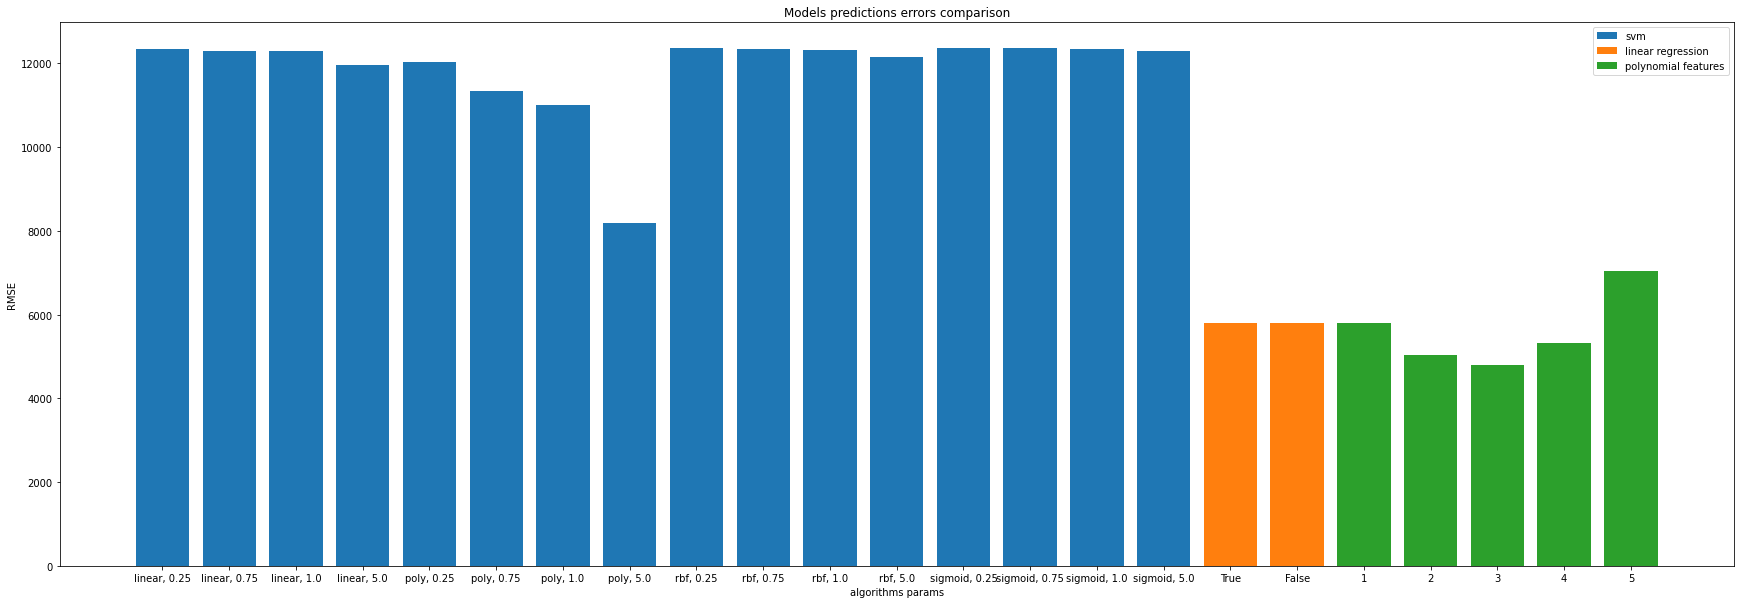

In [44]:
plt.figure(figsize=(30, 10))

plt.bar(svm_args_string, svm_errors, label="svm")
plt.bar(linear_regression_args_string, linear_regression_errors, label="linear regression")
plt.bar(polynomial_features_args_string, polynomial_features_errors, label="polynomial features")

plt.title("Models predictions errors comparison")
plt.xlabel("algorithms params")
plt.ylabel("RMSE")
plt.legend(loc="best")
plt.show()